# ezplot Tutorial
Welcome to the Plot-Hero package documentation! This package provides an easy-to-use function, plot_histogram, for creating beautiful visualizations of your data. Here, we’ll walk through the functionality with a fun, real-life example starring Alex, a budding data scientist on a quest to uncover insights in marketing data.

### Alex's Data Visualization Quest
Alex, an intern at a marketing firm, was tasked with analyzing campaign data to understand what works and what doesn’t. However, Alex knew that numbers alone weren’t enough—they needed visualizations to make their insights shine. That’s where Plot-Hero came to the rescue with the mighty plot_histogram function!

### Step 1: Setup
Alex began their journey by loading the marketing dataset, which contained details about campaign types, success rates, and even the channels used to target specific audiences.

In [2]:
import dsci_524_ezplot

print(dsci_524_ezplot.__version__)

0.1.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dsci_524_ezplot.plot_histogram import plot_histogram
from dsci_524_ezplot.plot_line import plot_line
from dsci_524_ezplot.plot_scatterplot import plot_scatterplot
from dsci_524_ezplot.plot_heatmap import plot_heatmap

In [18]:
data = pd.read_csv("marketing_campaign_dataset.csv")
data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


### Step 2: Plotting a Histogram for a Numerical Column
Alex's first task was to understand the distribution of Conversion_Rate to show the distribution of conversion rates across campaigns.

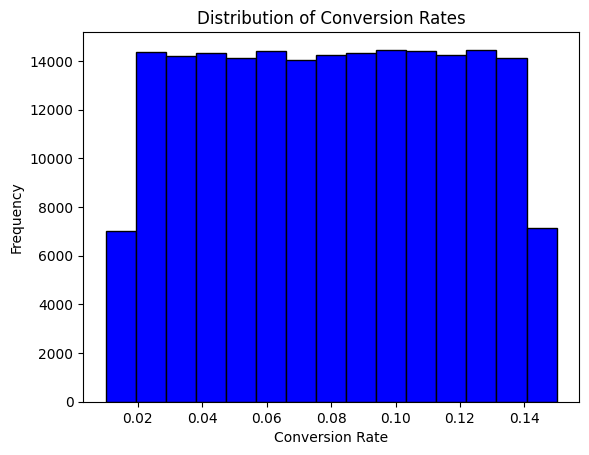

In [19]:
fig, ax = plot_histogram (
    df=data,
    column="Conversion_Rate",
    bins=15,
    title="Distribution of Conversion Rates",
    xlabel="Conversion Rate",
    ylabel="Frequency",
    color="blue"
)
plt.show()

The plot highlights the conversion rates of campaigns in bins. Alex can now point out patterns, such as campaigns never achieves conversion rates above 0.16 and anything above 0.08 is better than average.

### Step 3: Plotting a Bar Plot for a Categorical Column
Next, Alex turned their attention to the Channel_Used column to see which platforms marketers favored. Since this column was categorical, Alex used plot_histogram to create a bar plot:

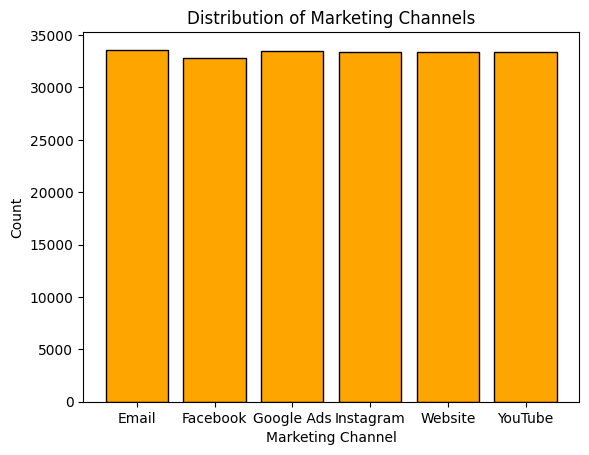

In [20]:
fig, ax = plot_histogram(
    df=data,
    column="Channel_Used",
    title="Distribution of Marketing Channels",
    xlabel="Marketing Channel",
    ylabel="Count",
    color="orange"
)
plt.show()


The plot clearly shows the distribution of marketing channels, with each bar representing the count of campaigns run on different platforms. It's evident that platforms like YouTube, Google Ads, and others are used equally often in the dataset.

### Step 4: Tracking Campaign Performance Over Time
Alex wanted to analyze how campaign performance changed over time. The plot_line function was perfect for visualizing this temporal trend.

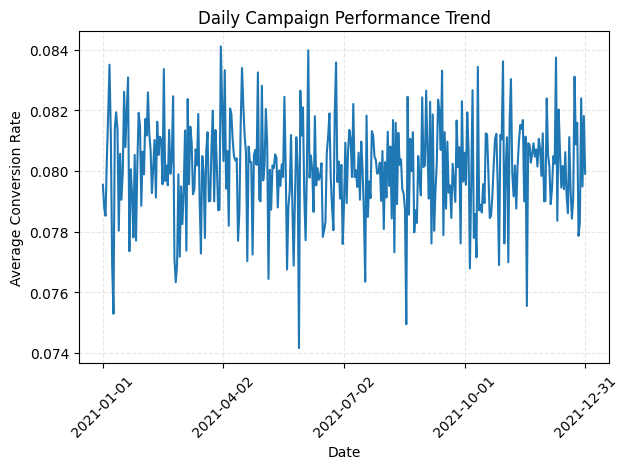

In [21]:
daily_performance = data.groupby('Date')['Conversion_Rate'].mean().reset_index()
daily_performance['Date'] = pd.to_datetime(daily_performance['Date'])
daily_performance['Date_Numeric'] = (daily_performance['Date'] - pd.Timestamp('1970-01-01')).dt.days

fig, ax = plot_line(
    df=daily_performance,
    x="Date_Numeric",
    y="Conversion_Rate",
    title="Daily Campaign Performance Trend",
    xlabel="Date",
    ylabel="Average Conversion Rate"
)

n_ticks = 5
step = len(daily_performance) // (n_ticks - 1)
tick_indices = range(0, len(daily_performance), step)
tick_positions = [daily_performance['Date_Numeric'].iloc[i] for i in tick_indices]
tick_labels = [daily_performance['Date'].iloc[i].strftime('%Y-%m-%d') for i in tick_indices]

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alex noticed several interesting patterns in the campaign performance throughout 2021. The daily conversion rates showed consistent fluctuations between 7.6% and 8.4%, suggesting that while there was variability in campaign performance, it maintained a relatively stable range.

Alex was particularly intrigued by several notable features in the data:
- The highest peaks reached approximately 8.4% conversion rate, occurring multiple times throughout the year
- A significant dip appeared in early July, where the conversion rate dropped to about 7.4%
- Most campaigns maintained an average conversion rate around 8%

This visualization helped Alex identify both successful periods and areas for improvement. The consistent oscillation pattern suggested that external factors, such as seasonality or market conditions, might be influencing campaign performance. 

### Step 5: Create a Scatterplot to Compare the Conversion Rate to ROI for each Channel
Next, to gain a better understanding of how each marketing channel performed, Alex decided to create a scatter plot comparing the Conversion Rate to ROI for each channel. Alex knew that this visualization could help identify patterns or outliers that weren’t immediately obvious looking at the dataset.

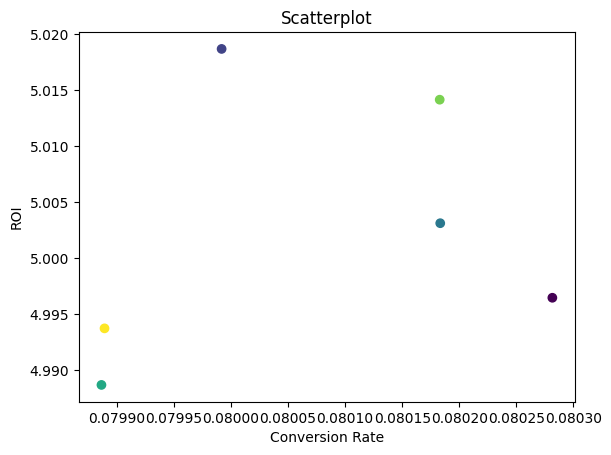

In [22]:
aggregated_data = data.groupby('Channel_Used')[['Conversion_Rate', 'ROI']].mean().reset_index()

fig, ax = plot_scatterplot(df = aggregated_data, x = "Conversion_Rate" , y = "ROI", color = "Channel_Used", title="Scatterplot", xlabel="Conversion Rate", ylabel="ROI")

With the campaign data now aggregated by Channel_Used, Alex could clearly compare the Conversion Rate and ROI for each channel. The aggregation helped simplify the data, giving Alex a clearer picture of how each marketing channel performed on average. From this visual, Alex could now confidently present the performance of each marketing channel. Google Ads seemed like a strong contender for future campaigns. By visualizing these two metrics together, Alex could now provide insights on where the marketing team should focus efforts to improve efficiency and returns. 

### Step 6: Uncovering Relationships with a Heatmap
Having explored conversion rates, campaign performance trends, and ROI using bar plots, line plots, and scatterplots, Alex wanted to dive deeper. This time, Alex aimed to identify relationships between multiple variables in the dataset—such as how Conversion Rate, ROI, and Engagement Score might influence each other. To do this, Alex turned to heatmaps, a powerful visualization tool for showing correlations.

Using Plot-Hero’s plot_heatmap function, Alex started by computing a correlation matrix for the numeric variables:

In [16]:
correlation_matrix = data[["Conversion_Rate", "ROI", "Clicks", "Engagement_Score"]].corr()

With the correlation matrix ready, Alex generated a heatmap to visualize the relationships:

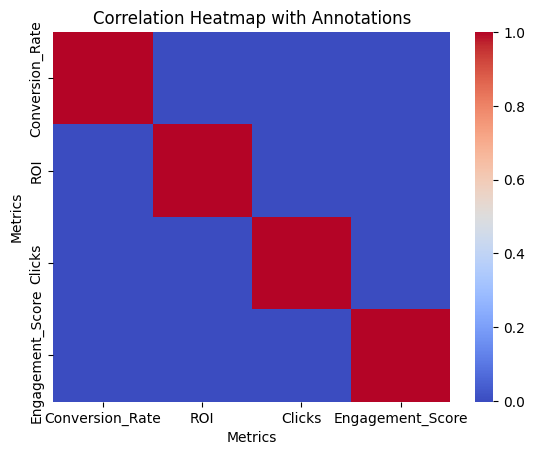

In [27]:
fig, ax = plot_heatmap(
    df=correlation_matrix,
    title="Correlation Heatmap with Annotations",
    xlabel="Metrics",
    ylabel="Metrics",
    cmap="coolwarm",
)

plt.show()

The resulting heatmap showed the correlations between the metrics. Alex noticed the following key insights:

- The diagonal cells, marked in bright yellow, represent perfect correlations of each metric with itself (as expected).
- There were no exceptionally strong correlations between the different metrics (off-diagonal values were not close to 1.0 or -1.0).
- This indicated that each metric provided distinct information about the campaigns, which was valuable for a multi-faceted analysis.

With this knowledge, Alex could confidently present the team's findings and suggest focusing on independent optimizations for each metric.

### Wrapping It All Up
With ezplot, Alex transformed complex data into actionable insights through clear, professional visuals. From histograms and line plots to scatterplots and heatmaps, ezplot made data visualization fast and effective.

Alex recommends ezplot for:
- Data professionals seeking quick, polished visualizations.
- Students and analysts focusing on insights, not coding complexities.

“ezplot simplified my workflow and let me focus on the story behind the data. It’s a must-have tool for anyone working with data!”

Now it’s your turn to explore the power of ezplot. Happy visualizing! 🚀